In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,8]
import numpy as np
from datetime import datetime as dt

In [72]:
for i in range(104660,104665):
    hdul = fits.open(f'data/Image{i}.fits')
    if i == 104660:
        data = hdul[0].data[40:4124,5:2040]
        continue
    data = np.concatenate((data, hdul[0].data[40:4124,5:2040]), axis=1)

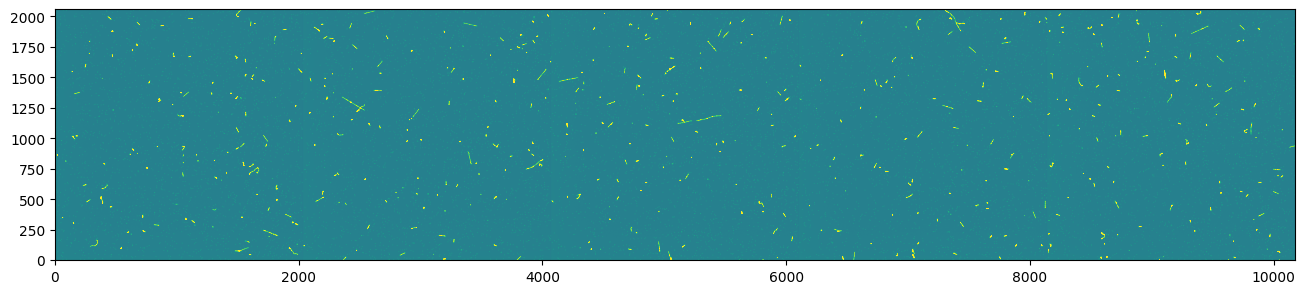

In [73]:
plt.imshow(data,origin="lower",vmin=3000,vmax=5000)

In [87]:
def split_image(data, M, N):
    # split the image into MxN blocks
    return_data = []
    temp_list = np.array_split(data,M,axis=0)
    for array in temp_list:
        return_data.append(np.array_split(array,N,axis=1))
    return return_data
split_data = split_image(data, 10,50)

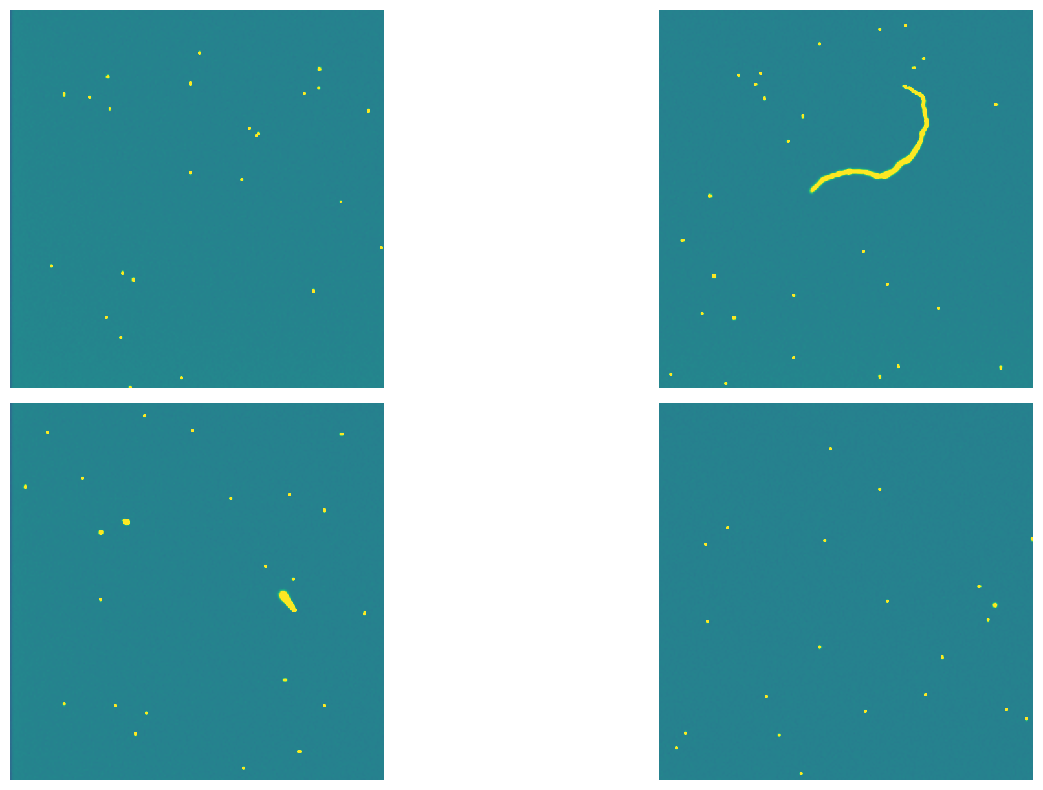

In [88]:
# Plot all the blocks in a subplot
fig, ax = plt.subplots(nrows=2,ncols=2)
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(split_data[i][j],origin="lower",vmin=3000,vmax=5000)
        ax[i,j].set_axis_off()
fig.tight_layout()